In [1]:
"""

import os
from PIL import Image

def resize_image(image_path, new_size):
    img = Image.open(image_path)
    resized_img = img.resize(new_size)
    resized_img.save(image_path)

base_dir = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"

# GoodImg ve BadImg klasörlerini dolaşma
for folder_name in ["GoodImg", "BadImag"]:
    folder_path = os.path.join(base_dir, folder_name)

    # Bmp ve Msk klasörlerini dolaşma
    for subfolder_name in ["Bmp", "Msk"]:
        subfolder_path = os.path.join(folder_path, subfolder_name)

        # Sample001 den Sample062 ye kadar olan klasörleri dolaşma
        for i in range(1, 63):
            sample_folder_name = f"Sample{i:03}"
            sample_folder_path = os.path.join(subfolder_path, sample_folder_name)

            # Görselleri dolaşma ve boyutlarını değiştirme
            for filename in os.listdir(sample_folder_path):
                if filename.endswith(".jpg") or filename.endswith(".png"):
                    image_path = os.path.join(sample_folder_path, filename)
                    resize_image(image_path, (20, 20))


"""

'\n\nimport os\nfrom PIL import Image\n\ndef resize_image(image_path, new_size):\n    img = Image.open(image_path)\n    resized_img = img.resize(new_size)\n    resized_img.save(image_path)\n\nbase_dir = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"\n\n# GoodImg ve BadImg klasörlerini dolaşma\nfor folder_name in ["GoodImg", "BadImag"]:\n    folder_path = os.path.join(base_dir, folder_name)\n\n    # Bmp ve Msk klasörlerini dolaşma\n    for subfolder_name in ["Bmp", "Msk"]:\n        subfolder_path = os.path.join(folder_path, subfolder_name)\n\n        # Sample001 den Sample062 ye kadar olan klasörleri dolaşma\n        for i in range(1, 63):\n            sample_folder_name = f"Sample{i:03}"\n            sample_folder_path = os.path.join(subfolder_path, sample_folder_name)\n\n            # Görselleri dolaşma ve boyutlarını değiştirme\n            for filename in os.listdir(sample_folder_path):\n                if filename.endswith(".jpg") or filename.endswith(".png"):\n          

# VERİ İŞLEME

In [2]:
"""

import cv2
import os
import time
import shutil

def preprocess_image(image_path):
    # Load image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Sharpen edges
    blurred = cv2.GaussianBlur(img, (0, 0), 3)
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    
    # Reduce noise
    denoised = cv2.fastNlMeansDenoising(sharpened, h=10)
    
    # Canny edge detection
    edges = cv2.Canny(denoised, 30, 100)
    
    return edges

# Path to the source directory containing the images
source_directory = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"

# Path to the target directory to save processed images
target_directory = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# List of target subdirectories
subdirectories = ["GoodImg", "BadImag"]

# Record the start time
start_time = time.time()

# Iterate over the subdirectories
for subdir in subdirectories:
    source_subdirectory = os.path.join(source_directory, subdir, "Bmp")
    target_subdirectory = os.path.join(target_directory, subdir, "Bmp")
    
    # Create the target subdirectory if it doesn't exist
    if not os.path.exists(target_subdirectory):
        os.makedirs(target_subdirectory)
    
    # Iterate over all the Sample directories
    for i in range(1, 63):
        sample_folder_name = f"Sample{i:03}"
        source_sample_folder = os.path.join(source_subdirectory, sample_folder_name)
        target_sample_folder = os.path.join(target_subdirectory, sample_folder_name)
        
        # Create the target Sample folder if it doesn't exist
        if not os.path.exists(target_sample_folder):
            os.makedirs(target_sample_folder)
        
        # Iterate over all the images in the Sample directory
        for filename in os.listdir(source_sample_folder):
            source_image_path = os.path.join(source_sample_folder, filename)
            target_image_path = os.path.join(target_sample_folder, filename)
            
            # Apply preprocessing to the image
            processed_image = preprocess_image(source_image_path)
            
            # Save the processed image to the target directory
            cv2.imwrite(target_image_path, processed_image)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the total processing time
print(f"Total processing time for all images: {elapsed_time:.2f} seconds")



"""

'\n\nimport cv2\nimport os\nimport time\nimport shutil\n\ndef preprocess_image(image_path):\n    # Load image as grayscale\n    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)\n    \n    # Sharpen edges\n    blurred = cv2.GaussianBlur(img, (0, 0), 3)\n    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)\n    \n    # Reduce noise\n    denoised = cv2.fastNlMeansDenoising(sharpened, h=10)\n    \n    # Canny edge detection\n    edges = cv2.Canny(denoised, 30, 100)\n    \n    return edges\n\n# Path to the source directory containing the images\nsource_directory = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"\n\n# Path to the target directory to save processed images\ntarget_directory = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img"\n\n# Create the target directory if it doesn\'t exist\nif not os.path.exists(target_directory):\n    os.makedirs(target_directory)\n\n# List of target subdirectories\nsubdirectories = ["GoodImg", "BadImag"]\n\n# Record the start time\nstart_

In [3]:
"""

import cv2
import os
import time
import shutil
import numpy as np

def preprocess_image(image_path):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Kenarları belirginleştir
    blurred = cv2.GaussianBlur(img, (0, 0), 3)
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

    # Gürültüyü azalt
    denoised = cv2.fastNlMeansDenoising(sharpened, h=10)

    # Karakterleri beyaz renkle temsil et
    threshold, _ = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Arka plana göre esnek piksel değerlerini sınırla
    processed_img = np.where(img < threshold, 255, 0).astype(np.uint8)
    
    return processed_img

# Path to the source directory containing the images
source_directory = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"

# Path to the target directory to save processed images
target_directory = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img2"

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# List of target subdirectories
subdirectories = ["GoodImg", "BadImag"]

# Record the start time
start_time = time.time()

# Iterate over the subdirectories
for subdir in subdirectories:
    source_subdirectory = os.path.join(source_directory, subdir, "Bmp")
    target_subdirectory = os.path.join(target_directory, subdir, "Bmp")
    
    # Create the target subdirectory if it doesn't exist
    if not os.path.exists(target_subdirectory):
        os.makedirs(target_subdirectory)
    
    # Iterate over all the Sample directories
    for i in range(1, 63):
        sample_folder_name = f"Sample{i:03}"
        source_sample_folder = os.path.join(source_subdirectory, sample_folder_name)
        target_sample_folder = os.path.join(target_subdirectory, sample_folder_name)
        
        # Create the target Sample folder if it doesn't exist
        if not os.path.exists(target_sample_folder):
            os.makedirs(target_sample_folder)
        
        # Iterate over all the images in the Sample directory
        for filename in os.listdir(source_sample_folder):
            source_image_path = os.path.join(source_sample_folder, filename)
            target_image_path = os.path.join(target_sample_folder, filename)
            
            # Apply preprocessing to the image
            processed_image = preprocess_image(source_image_path)
            
            # Save the processed image to the target directory
            cv2.imwrite(target_image_path, processed_image)

# Calculate the elapsed time
elapsed_time = time.time() - start_time

# Print the total processing time
print(f"Total processing time for all images: {elapsed_time:.2f} seconds")

"""

'\n\nimport cv2\nimport os\nimport time\nimport shutil\nimport numpy as np\n\ndef preprocess_image(image_path):\n\n    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)\n\n    # Kenarları belirginleştir\n    blurred = cv2.GaussianBlur(img, (0, 0), 3)\n    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)\n\n    # Gürültüyü azalt\n    denoised = cv2.fastNlMeansDenoising(sharpened, h=10)\n\n    # Karakterleri beyaz renkle temsil et\n    threshold, _ = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)\n\n    # Arka plana göre esnek piksel değerlerini sınırla\n    processed_img = np.where(img < threshold, 255, 0).astype(np.uint8)\n    \n    return processed_img\n\n# Path to the source directory containing the images\nsource_directory = "C:\\Users\\lenovo\\Downloads\\EnglishImg\\English\\Img"\n\n# Path to the target directory to save processed images\ntarget_directory = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img2"\n\n# Create the target directory if it does

In [4]:
"""

import os
import shutil

# Karakterlerin bulunduğu stringler
numeric_characters = "0123456789"
uppercase_characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lowercase_characters = "abcdefghijklmnopqrstuvwxyz"

# Hedef dizinlerin oluşturulması
output_dir = "C:\\Users\\lenovo\\Desktop\\neural_proje\\sonson"
os.makedirs(output_dir, exist_ok=True)

# Img klasöründeki "GoodImg" ve "BadImag" klasörlerinin dolaşılması
img_folder = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img"
for subfolder in ["GoodImg", "BadImag"]:
    subfolder_path = os.path.join(img_folder, subfolder)

    # "Bmp" klasörünün oluşturulması
    bmp_folder_path = os.path.join(subfolder_path, "Bmp")
    os.makedirs(bmp_folder_path, exist_ok=True)

    # "Sample" klasörlerinin dolaşılması
    for sample_folder in os.listdir(bmp_folder_path):
        sample_folder_path = os.path.join(bmp_folder_path, sample_folder)
        if not os.path.isdir(sample_folder_path):
            continue

        # Hedef dizinlerin oluşturulması
        character_index = int(sample_folder[6:]) - 1
        character = None
        character_output_dir = None
        if character_index < len(numeric_characters):
            character = numeric_characters[character_index]
            character_output_dir = os.path.join(output_dir, "numeric", character)
        elif character_index < len(numeric_characters) + len(uppercase_characters):
            character = uppercase_characters[character_index - len(numeric_characters)]
            character_output_dir = os.path.join(output_dir, "uppercase", character)
        else:
            character = lowercase_characters[character_index - len(numeric_characters) - len(uppercase_characters)]
            character_output_dir = os.path.join(output_dir, "lowercase", character)

        os.makedirs(character_output_dir, exist_ok=True)

        output_sample_folder_path = os.path.join(character_output_dir, sample_folder)
        os.makedirs(output_sample_folder_path, exist_ok=True)

        # Görsellerin kopyalanması
        for image_file in os.listdir(sample_folder_path):
            if image_file.lower().endswith((".png", ".jpg")):
                image_path = os.path.join(sample_folder_path, image_file)
                
                # Dosya ismini değiştirme
                if subfolder == "BadImag":
                    image_file = image_file[:-4] + "b" + image_file[-4:]
                
                output_path = os.path.join(output_sample_folder_path, image_file)
                shutil.copyfile(image_path, output_path)

                # print("Görsel kopyalandı:", image_file)

print("Görseller işlendi ve etiketlendirildi.")


"""

'\n\nimport os\nimport shutil\n\n# Karakterlerin bulunduğu stringler\nnumeric_characters = "0123456789"\nuppercase_characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"\nlowercase_characters = "abcdefghijklmnopqrstuvwxyz"\n\n# Hedef dizinlerin oluşturulması\noutput_dir = "C:\\Users\\lenovo\\Desktop\\neural_proje\\sonson"\nos.makedirs(output_dir, exist_ok=True)\n\n# Img klasöründeki "GoodImg" ve "BadImag" klasörlerinin dolaşılması\nimg_folder = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img"\nfor subfolder in ["GoodImg", "BadImag"]:\n    subfolder_path = os.path.join(img_folder, subfolder)\n\n    # "Bmp" klasörünün oluşturulması\n    bmp_folder_path = os.path.join(subfolder_path, "Bmp")\n    os.makedirs(bmp_folder_path, exist_ok=True)\n\n    # "Sample" klasörlerinin dolaşılması\n    for sample_folder in os.listdir(bmp_folder_path):\n        sample_folder_path = os.path.join(bmp_folder_path, sample_folder)\n        if not os.path.isdir(sample_folder_path):\n            continue\n\n        # Hedef di

In [5]:
"""

import os
import shutil

# Karakterlerin bulunduğu stringler
numeric_characters = "0123456789"
uppercase_characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
lowercase_characters = "abcdefghijklmnopqrstuvwxyz"

# Hedef dizinlerin oluşturulması
output_dir = "C:\\Users\\lenovo\\Desktop\\neural_proje\\sonson2"
os.makedirs(output_dir, exist_ok=True)

# Img klasöründeki "GoodImg" ve "BadImag" klasörlerinin dolaşılması
img_folder = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img2"
for subfolder in ["GoodImg", "BadImag"]:
    subfolder_path = os.path.join(img_folder, subfolder)

    # "Bmp" klasörünün oluşturulması
    bmp_folder_path = os.path.join(subfolder_path, "Bmp")
    os.makedirs(bmp_folder_path, exist_ok=True)

    # "Sample" klasörlerinin dolaşılması
    for sample_folder in os.listdir(bmp_folder_path):
        sample_folder_path = os.path.join(bmp_folder_path, sample_folder)
        if not os.path.isdir(sample_folder_path):
            continue

        # Hedef dizinlerin oluşturulması
        character_index = int(sample_folder[6:]) - 1
        character = None
        character_output_dir = None
        if character_index < len(numeric_characters):
            character = numeric_characters[character_index]
            character_output_dir = os.path.join(output_dir, "numeric", character)
        elif character_index < len(numeric_characters) + len(uppercase_characters):
            character = uppercase_characters[character_index - len(numeric_characters)]
            character_output_dir = os.path.join(output_dir, "uppercase", character)
        else:
            character = lowercase_characters[character_index - len(numeric_characters) - len(uppercase_characters)]
            character_output_dir = os.path.join(output_dir, "lowercase", character)

        os.makedirs(character_output_dir, exist_ok=True)

        output_sample_folder_path = os.path.join(character_output_dir, sample_folder)
        os.makedirs(output_sample_folder_path, exist_ok=True)

        # Görsellerin kopyalanması
        for image_file in os.listdir(sample_folder_path):
            if image_file.lower().endswith((".png", ".jpg")):
                image_path = os.path.join(sample_folder_path, image_file)
                
                # Dosya ismini değiştirme
                if subfolder == "BadImag":
                    image_file = image_file[:-4] + "b" + image_file[-4:]
                
                output_path = os.path.join(output_sample_folder_path, image_file)
                shutil.copyfile(image_path, output_path)

                # print("Görsel kopyalandı:", image_file)

print("Görseller işlendi ve etiketlendirildi.")


"""

'\n\nimport os\nimport shutil\n\n# Karakterlerin bulunduğu stringler\nnumeric_characters = "0123456789"\nuppercase_characters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"\nlowercase_characters = "abcdefghijklmnopqrstuvwxyz"\n\n# Hedef dizinlerin oluşturulması\noutput_dir = "C:\\Users\\lenovo\\Desktop\\neural_proje\\sonson2"\nos.makedirs(output_dir, exist_ok=True)\n\n# Img klasöründeki "GoodImg" ve "BadImag" klasörlerinin dolaşılması\nimg_folder = "C:\\Users\\lenovo\\Desktop\\neural_proje\\Img2"\nfor subfolder in ["GoodImg", "BadImag"]:\n    subfolder_path = os.path.join(img_folder, subfolder)\n\n    # "Bmp" klasörünün oluşturulması\n    bmp_folder_path = os.path.join(subfolder_path, "Bmp")\n    os.makedirs(bmp_folder_path, exist_ok=True)\n\n    # "Sample" klasörlerinin dolaşılması\n    for sample_folder in os.listdir(bmp_folder_path):\n        sample_folder_path = os.path.join(bmp_folder_path, sample_folder)\n        if not os.path.isdir(sample_folder_path):\n            continue\n\n        # Hedef 

In [6]:
!pip install torchinfo


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchinfo import summary
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [8]:
df_cany = pd.read_csv("/kaggle/input/julia-dataset/dataset1.csv")

In [9]:
df = pd.read_csv("/kaggle/input/julia-dataset/dataset2.csv")

In [10]:
df['image_name'] = '2' + df['image_name']

In [11]:
df.head()

,image_name,label,pixels
0,2img037-00001.png,a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,2img037-00001b.png,a,"[[0, 255, 255, 255, 255, 255, 255, 255, 255, 2..."
2,2img037-00002.png,a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,2img037-00002b.png,a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,2img037-00003.png,a,"[[255, 255, 255, 255, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [12]:
df_cany.head()

,image_name,label,pixels
0,img037-00001.png,a,"[[0, 0, 0, 0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, ..."
1,img037-00001b.png,a,"[[0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,img037-00002.png,a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,img037-00002b.png,a,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,img037-00003.png,a,"[[0, 255, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


# DATA AUGMENTATION

In [13]:
merged_dataset = pd.concat([df, df_cany], ignore_index=True).sort_values(by='label')

In [14]:
merged_dataset.head()

,image_name,label,pixels
15853,img001-00001.png,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3378,2img001-00015.png,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3377,2img001-00014b.png,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3376,2img001-00014.png,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3375,2img001-00013b.png,0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


**Aynı görsellere iki farklı pre-process işlemi uygulayarak iki farklı veriseti oluşturup ardından bunları birleştirdiğimiz bir Data Augmentation yaptık.**

**Eğitimizin başarısını arttırdığını VGG16 modeli üzerinden gözlemledim. Soldaki görselle temsil ettiğim veriseti eğitim sonrası %69 civarı bir başarı yakalarken, sağdaki ise %66 civarı yakalıyordu fakat ikisini birleştirdiğim "merged_dataset" %80 gibi başarılar yakaladı.** 

![Imgur](https://i.imgur.com/6DgoYPS.png)

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split

# X (pixel) ve Y (label) değerlerini ayırın
X = merged_dataset["pixels"].values
Y = merged_dataset["label"].values

X = np.array([np.array(eval(pixel)) for pixel in X], dtype=np.float32)
# Label'ları sayısal değerlere dönüştürmek için bir sözlük oluşturun
label_dict = {label: i for i, label in enumerate(np.unique(Y))}

# Label'ları sayısal değerlere dönüştürün
Y = np.array([label_dict[label] for label in Y])

# Train ve geri kalan veri setlerini oluşturun
X_train, X_remaining, Y_train, Y_remaining = train_test_split(X, Y, test_size=0.3, random_state=42)

# Geri kalan veri setini validasyon ve test olarak ayırın
X_val, X_test, Y_val, Y_test = train_test_split(X_remaining, Y_remaining, test_size=0.5, random_state=42)

# Sonuçları kontrol edin
print("Train veri seti boyutu:", X_train.shape)
print("Validasyon veri seti boyutu:", X_val.shape)
print("Test veri seti boyutu:", X_test.shape)
print("Train etiket seti boyutu:", Y_train.shape)
print("Validasyon etiket seti boyutu:", Y_val.shape)
print("Test etiket seti boyutu:", Y_test.shape)

Train veri seti boyutu: (17504, 20, 20)
Validasyon veri seti boyutu: (3751, 20, 20)
Test veri seti boyutu: (3751, 20, 20)
Train etiket seti boyutu: (17504,)
Validasyon etiket seti boyutu: (3751,)
Test etiket seti boyutu: (3751,)


# VGG-16

Aşağıda gördüğünüz kodda ilk katman ile ikinci katmanın feature map sayılarının aynı olduğunu görebilirsiniz. Bunu yapma sebebim aynı katman sayısında kalıp en optimal sonuçları almam oldu. Detaylıca bahsedeceğim.

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Cihazı seçin (GPU kullanılacaksa)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Modeli tanımlayın
class VGG16(nn.Module):
    def __init__(self, num_classes=62):
        super(VGG16, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 62, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(62, 62, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(62, 124, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(124, 248, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(248, 496, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(496, 62, kernel_size=3, padding=1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(62 * 20 * 20, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Hyperparameters
num_epochs = 25
learning_rate = 0.0001
batch_size = 128

# Modeli oluşturma ve GPU'ya taşıma
model = VGG16(num_classes=62).to(device)

![Imgur](https://i.imgur.com/m5wTjZ8.png)

In [69]:
summary(model)

Layer (type:depth-idx)                   Param #
VGG16                                    --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       620
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       34,658
│    └─ReLU: 2-4                         --
│    └─Conv2d: 2-5                       69,316
│    └─ReLU: 2-6                         --
│    └─Conv2d: 2-7                       277,016
│    └─ReLU: 2-8                         --
│    └─Conv2d: 2-9                       1,107,568
│    └─ReLU: 2-10                        --
│    └─Conv2d: 2-11                      276,830
├─Sequential: 1-2                        --
│    └─Linear: 2-12                      101,584,896
│    └─ReLU: 2-13                        --
│    └─Dropout: 2-14                     --
│    └─Linear: 2-15                      16,781,312
│    └─ReLU: 2-16                        --
│    └─Dropout: 2-17                     --
│    └─Linear: 2-18         

In [74]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


# Train veri setini TensorDataset olarak oluşturun
train_dataset = TensorDataset(torch.from_numpy(X_train).unsqueeze(1), torch.from_numpy(Y_train))

# Validation veri setini TensorDataset olarak oluşturun
val_dataset = TensorDataset(torch.from_numpy(X_val).unsqueeze(1), torch.from_numpy(Y_val))

# Test veri setini TensorDataset olarak oluşturun
test_dataset = TensorDataset(torch.from_numpy(X_test).unsqueeze(1), torch.from_numpy(Y_test))


Test Dataloader'ımdaki bir batch'te bulunan görüntüler.

![Imgur](https://i.imgur.com/hmFjhoy.png)

In [75]:
# Loss fonksiyonu
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader oluşturma
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Eğitim döngüsü
train_accuracy_list = []
val_accuracy_list = []

In [76]:
for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna geçir
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device).long()

        optimizer.zero_grad()  # Gradyanları sıfırla

        # İleri geçiş
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Geriye yayılım
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    train_loss /= len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_accuracy_list.append(train_accuracy)

    # Validasyon döngüsü
    model.eval()  # Modeli değerlendirme moduna geçir
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Gradyan hesaplamalarını kapat
        for val_inputs, val_targets in val_dataloader:
            val_inputs = val_inputs.to(device)
            val_targets = val_targets.to(device).long()

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item()

            _, predicted = torch.max(val_outputs, 1)
            val_total += val_targets.size(0)
            val_correct += (predicted == val_targets).sum().item()

    val_loss /= len(val_dataloader)
    val_accuracy = val_correct / val_total
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test döngüsü
model.eval()  # Modeli değerlendirme moduna geçir
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Gradyan hesaplamalarını kapat
    for test_inputs, test_targets in test_dataloader:
        test_inputs = test_inputs.to(device)
        test_targets = test_targets.to(device).long()

        test_outputs = model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item()

        _, predicted = torch.max(test_outputs, 1)
        test_total += test_targets.size(0)
        test_correct += (predicted == test_targets).sum().item()

test_loss /= len(test_dataloader)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch: 1/25, Loss: 2.4487, Val Loss: 1.1992, Train Accuracy: 0.3951, Val Accuracy: 0.6724
Epoch: 2/25, Loss: 1.1064, Val Loss: 0.9283, Train Accuracy: 0.6915, Val Accuracy: 0.7505
Epoch: 3/25, Loss: 0.8191, Val Loss: 0.8360, Train Accuracy: 0.7598, Val Accuracy: 0.7713
Epoch: 4/25, Loss: 0.6162, Val Loss: 0.7709, Train Accuracy: 0.8135, Val Accuracy: 0.7673
Epoch: 5/25, Loss: 0.4347, Val Loss: 0.7384, Train Accuracy: 0.8640, Val Accuracy: 0.8011
Epoch: 6/25, Loss: 0.3082, Val Loss: 0.7508, Train Accuracy: 0.8983, Val Accuracy: 0.7995
Epoch: 7/25, Loss: 0.2155, Val Loss: 0.8425, Train Accuracy: 0.9282, Val Accuracy: 0.8099
Epoch: 8/25, Loss: 0.1700, Val Loss: 0.7653, Train Accuracy: 0.9449, Val Accuracy: 0.7977
Epoch: 9/25, Loss: 0.1413, Val Loss: 0.8886, Train Accuracy: 0.9530, Val Accuracy: 0.8086
Epoch: 10/25, Loss: 0.1046, Val Loss: 0.8999, Train Accuracy: 0.9674, Val Accuracy: 0.8073
Epoch: 11/25, Loss: 0.0983, Val Loss: 0.7999, Train Accuracy: 0.9698, Val Accuracy: 0.8126
Epoch: 1

In [77]:
import plotly.express as px
import pandas as pd

# Train ve validation accuracy değerlerini içeren bir DataFrame oluşturma
data = {
    'Epoch': list(range(1, num_epochs+1)),
    'Train Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list
}
df_px = pd.DataFrame(data)

# Plotly express kullanarak grafik çizme
fig = px.line(df_px, x='Epoch', y=['Train Accuracy', 'Validation Accuracy'], title='Eğitim ve Doğrulama Doğruluk Değerleri')
fig.show()


In [22]:
import cv2

def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (20, 20))  # Görüntüyü 20x20 boyutuna yeniden boyutlandır

    # Kenarları belirginleştir
    blurred = cv2.GaussianBlur(img, (0, 0), 3)
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)

    # Gürültüyü azalt
    denoised = cv2.fastNlMeansDenoising(sharpened, h=10)

    # Karakterleri beyaz renkle temsil et
    threshold, _ = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Arka plana göre esnek piksel değerlerini sınırla
    processed_img = np.where(img < threshold, 255, 0).astype(np.uint8)

    return processed_img

In [23]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def preprocess_and_predict(image_path, model, label_encoder):
    # Görüntüyü preprocess et
    preprocessed_img = preprocess_image(image_path)

    # Görüntüyü tensora dönüştür
    input_tensor = torch.tensor(preprocessed_img, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)

    # Modeli değerlendirme moduna geçir
    model.eval()

    # Görüntüyü modele gönder ve tahmin yap
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_class = torch.max(output, 1)

    # Tahmin edilen sınıfı al
    predicted_class = predicted_class.item()

    # Sınıf indeksini etikete dönüştür
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    # Tahmin edilen sınıfı ve etiketi yazdır
    print(f"Tahmin edilen sınıf: {predicted_class}")
    print(f"Tahmin edilen etiket: {predicted_label}")

    # Preprocess edilmiş görüntüyü göster
    plt.imshow(preprocessed_img, cmap='gray')
    plt.title('Preprocess Edilmiş Görüntü')
    plt.axis('off')
    plt.show()
    


Tahmin edilen sınıf: 10
Tahmin edilen etiket: A


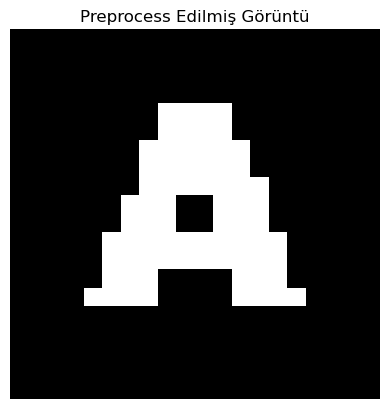

In [24]:
# LabelEncoder ve modeli oluşturma işlemleri

class_labels = merged_dataset['label'].unique().tolist()

label_encoder = LabelEncoder()
label_encoder.fit(class_labels)

# Fit the LabelEncoder with class labels

# Fonksiyonu kullanarak tahmin yapma
image_path = "/kaggle/input/image-up-a/Verlichte-letter-Luxonos-A.jpg"
preprocess_and_predict(image_path, model, label_encoder)


Tahmin edilen sınıf: 11
Tahmin edilen etiket: B


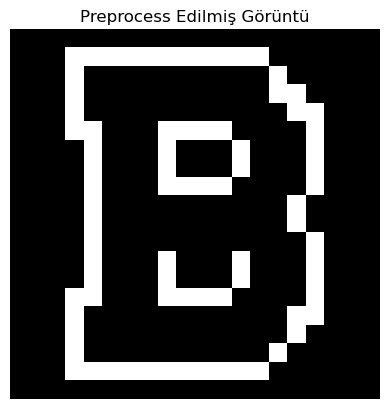

In [25]:
# Fonksiyonu kullanarak tahmin yapma
image_path = "/kaggle/input/image-up-b/51v6t7N3bCL.jpg"
preprocess_and_predict(image_path, model, label_encoder)


**Katmanlardaki feature map'lerin input matris için yakaladıkları öznitelikler:**

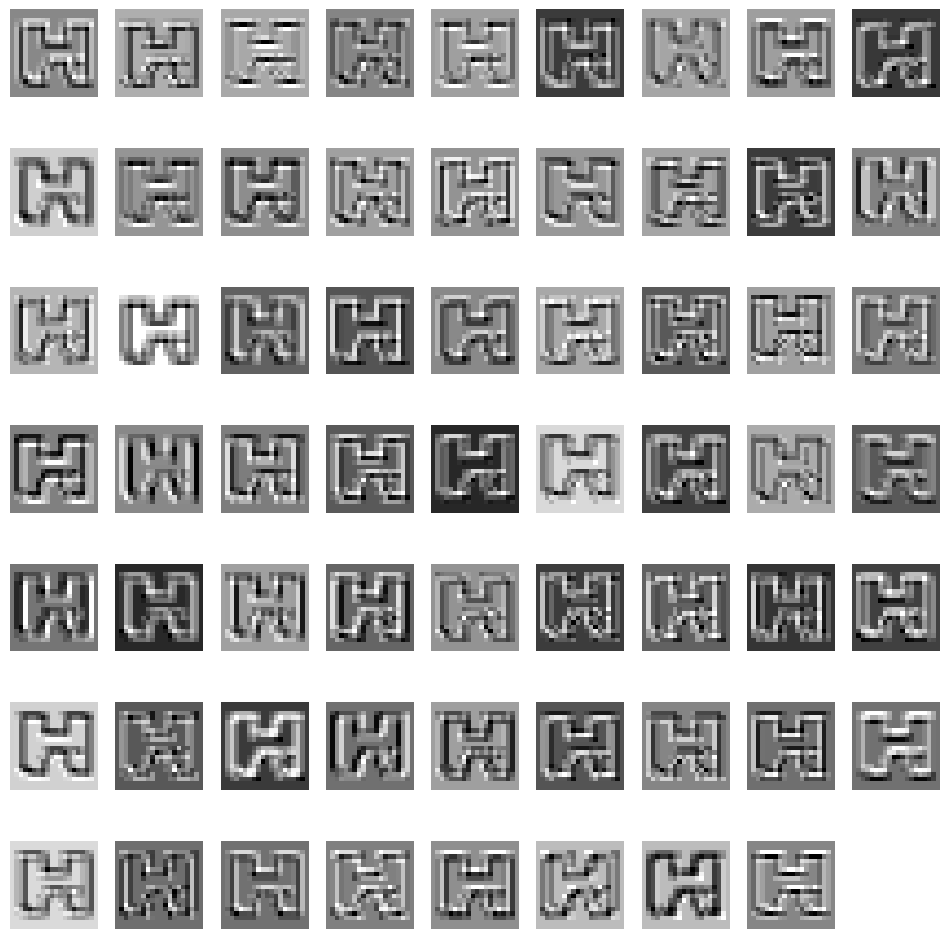

In [26]:
import matplotlib.pyplot as plt
import torch
import math


# Modeli değerlendirme moduna geçir
model.eval()

# Veri setinden bir örnek seçme
sample_index = 0  # Örnek index
input_tensor, _ = train_dataset[sample_index]  # Giriş tensörünü seçin

# Giriş tensörünü GPU belleğine taşıma
input_tensor = input_tensor.to('cuda')

# İlgili katmandaki özellik haritalarını elde etme
first_layer_outputs = model.features[0](input_tensor.unsqueeze(0))

# Creating Subplots for Feature Maps
num_maps = first_layer_outputs.shape[1]
num_rows = int(math.sqrt(num_maps))
num_cols = int(math.ceil(num_maps / num_rows))

# Subplot
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Feature Map Vis.
for i, ax in enumerate(axs.flat):
    if i < num_maps:
        map_data = first_layer_outputs[0, i].detach().cpu().numpy()
        ax.imshow(map_data, cmap='gray')
        #ax.set_title(f'Feature Map {i+1}')
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()


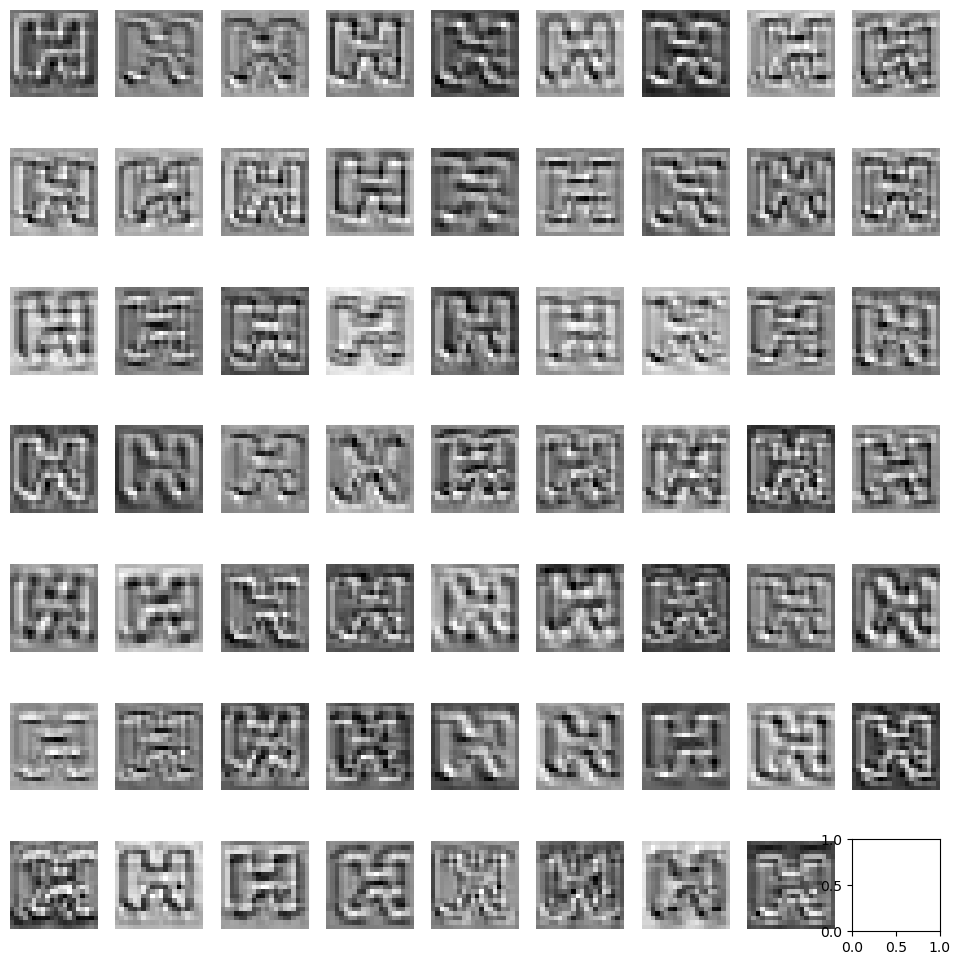

In [27]:
import matplotlib.pyplot as plt

# Modeli değerlendirme moduna geçir
model.eval()

# Veri setinden bir örnek seçme
sample_index = 0  # Örnek index
input_tensor, _ = train_dataset[sample_index]  # Giriş tensörünü seçin

# Giriş tensörünü GPU belleğine taşıma
input_tensor = input_tensor.to('cuda')

# İlgili katmandaki özellik haritalarını et
conv1_output = model.features[0](input_tensor.unsqueeze(0))
conv2_output = model.features[2](conv1_output)
conv3_output = model.features[4](conv2_output)
conv4_output = model.features[6](conv3_output)
conv5_output = model.features[8](conv4_output)
conv6_output = model.features[10](conv5_output)

# Özellik haritalarını görselleştirmek için subplot kullanma
num_maps = conv6_output.shape[1]
num_rows = int(math.sqrt(num_maps))
num_cols = int(math.ceil(num_maps / num_rows))

# Subplot oluşturma
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Özellik haritalarını gösterme
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < num_maps:
            map_data = conv6_output[0, index].detach().cpu().numpy()
            ax = axs[i, j]
            ax.imshow(map_data, cmap='gray')
            #ax.set_title(f'Feature Map {index+1}')
            ax.axis('off')
        else:
            ax.axis('off')

plt.show()


In [28]:
# Çıktı boyutunu kontrol etme
print(conv1_output.shape)
print(conv2_output.shape)
print(conv3_output.shape)
print(conv4_output.shape)
print(conv5_output.shape)
print(conv6_output.shape)


torch.Size([1, 62, 20, 20])
torch.Size([1, 62, 20, 20])
torch.Size([1, 124, 20, 20])
torch.Size([1, 248, 20, 20])
torch.Size([1, 496, 20, 20])
torch.Size([1, 62, 20, 20])


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Cihazı seçin (GPU kullanılacaksa)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Modeli tanımlayın
class VGG16(nn.Module):
    def __init__(self, num_classes=62):
        super(VGG16, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 62, kernel_size=3, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(62, 62, kernel_size=3, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(62, 124, kernel_size=3, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(124, 248, kernel_size=3, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(248, 496, kernel_size=3, padding=0),
            nn.ReLU(inplace=True),
            nn.Conv2d(496, 62, kernel_size=3, padding=0)
        )

        self.classifier = nn.Sequential(
            nn.Linear(62 * 8 * 8, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Hyperparameters
num_epochs = 25
learning_rate = 0.0001
batch_size = 128

# Modeli oluşturma ve GPU'ya taşıma
model = VGG16(num_classes=62).to(device)

![Imgur](https://i.imgur.com/8qQGGv4.png)

In [30]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


# Train veri setini TensorDataset olarak oluşturun
train_dataset = TensorDataset(torch.from_numpy(X_train).unsqueeze(1), torch.from_numpy(Y_train))

# Validation veri setini TensorDataset olarak oluşturun
val_dataset = TensorDataset(torch.from_numpy(X_val).unsqueeze(1), torch.from_numpy(Y_val))

# Test veri setini TensorDataset olarak oluşturun
test_dataset = TensorDataset(torch.from_numpy(X_test).unsqueeze(1), torch.from_numpy(Y_test))


In [31]:
# Loss fonksiyonu
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader oluşturma
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Eğitim döngüsü
train_accuracy_list = []
val_accuracy_list = []

In [32]:
for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna geçir
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device).long()

        optimizer.zero_grad()  # Gradyanları sıfırla

        # İleri geçiş
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Geriye yayılım
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    train_loss /= len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_accuracy_list.append(train_accuracy)

    # Validasyon döngüsü
    model.eval()  # Modeli değerlendirme moduna geçir
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Gradyan hesaplamalarını kapat
        for val_inputs, val_targets in val_dataloader:
            val_inputs = val_inputs.to(device)
            val_targets = val_targets.to(device).long()

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item()

            _, predicted = torch.max(val_outputs, 1)
            val_total += val_targets.size(0)
            val_correct += (predicted == val_targets).sum().item()

    val_loss /= len(val_dataloader)
    val_accuracy = val_correct / val_total
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test döngüsü
model.eval()  # Modeli değerlendirme moduna geçir
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Gradyan hesaplamalarını kapat
    for test_inputs, test_targets in test_dataloader:
        test_inputs = test_inputs.to(device)
        test_targets = test_targets.to(device).long()

        test_outputs = model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item()

        _, predicted = torch.max(test_outputs, 1)
        test_total += test_targets.size(0)
        test_correct += (predicted == test_targets).sum().item()

test_loss /= len(test_dataloader)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch: 1/25, Loss: 2.7605, Val Loss: 1.6536, Train Accuracy: 0.3130, Val Accuracy: 0.5487
Epoch: 2/25, Loss: 1.4592, Val Loss: 1.2255, Train Accuracy: 0.6034, Val Accuracy: 0.6620
Epoch: 3/25, Loss: 1.1468, Val Loss: 1.0765, Train Accuracy: 0.6749, Val Accuracy: 0.7022
Epoch: 4/25, Loss: 0.9653, Val Loss: 0.9922, Train Accuracy: 0.7156, Val Accuracy: 0.7049
Epoch: 5/25, Loss: 0.8308, Val Loss: 0.9376, Train Accuracy: 0.7505, Val Accuracy: 0.7187
Epoch: 6/25, Loss: 0.7111, Val Loss: 0.8982, Train Accuracy: 0.7785, Val Accuracy: 0.7443
Epoch: 7/25, Loss: 0.6116, Val Loss: 0.8685, Train Accuracy: 0.8054, Val Accuracy: 0.7521
Epoch: 8/25, Loss: 0.5123, Val Loss: 0.8651, Train Accuracy: 0.8326, Val Accuracy: 0.7499
Epoch: 9/25, Loss: 0.4406, Val Loss: 0.8961, Train Accuracy: 0.8541, Val Accuracy: 0.7502
Epoch: 10/25, Loss: 0.3625, Val Loss: 0.8854, Train Accuracy: 0.8777, Val Accuracy: 0.7587
Epoch: 11/25, Loss: 0.3031, Val Loss: 0.9159, Train Accuracy: 0.8961, Val Accuracy: 0.7617
Epoch: 1

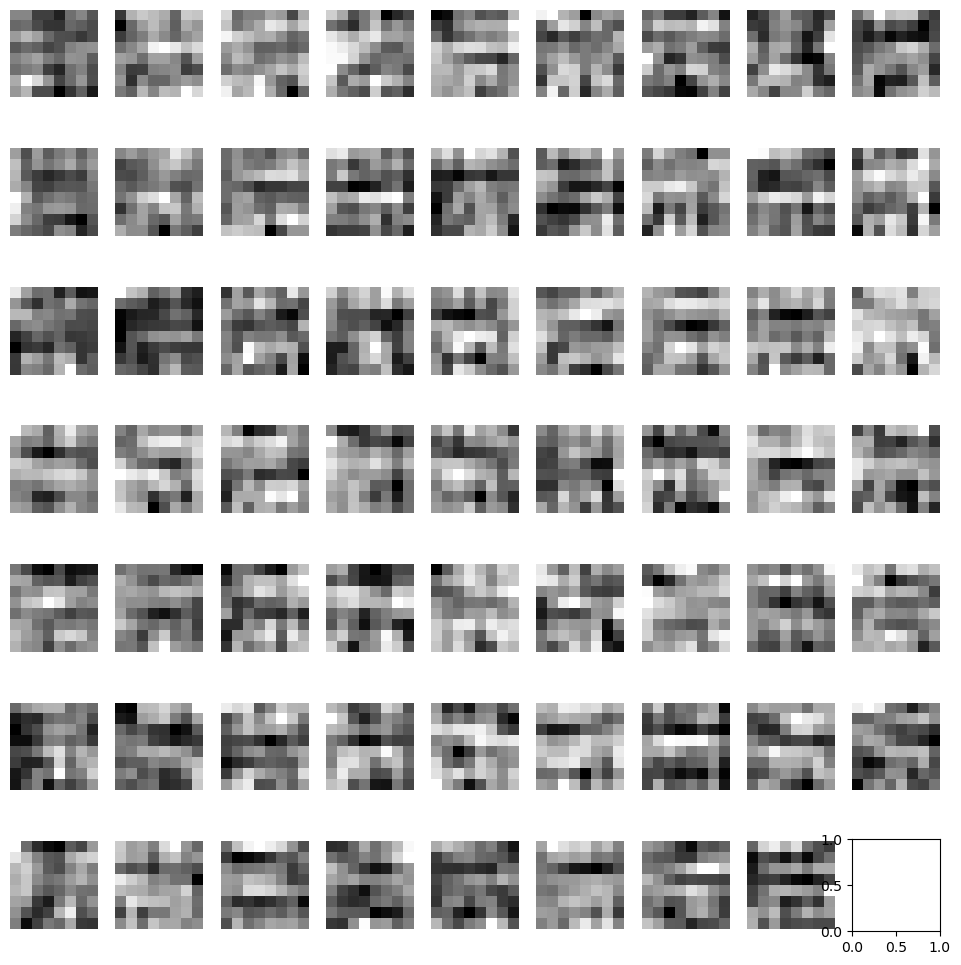

In [33]:
import matplotlib.pyplot as plt

# Modeli değerlendirme moduna geçir
model.eval()

# Veri setinden bir örnek seçme
sample_index = 0  # Örnek indexini belirleyin
input_tensor, _ = train_dataset[sample_index]  # Giriş tensörünü seçin

# Giriş tensörünü GPU belleğine taşıma
input_tensor = input_tensor.to('cuda')

# İlgili katmandaki özellik haritalarını elde etme
conv1_output = model.features[0](input_tensor.unsqueeze(0))
conv2_output = model.features[2](conv1_output)
conv3_output = model.features[4](conv2_output)
conv4_output = model.features[6](conv3_output)
conv5_output = model.features[8](conv4_output)
conv6_output = model.features[10](conv5_output)

# Özellik haritalarını görselleştirmek için subplot kullanma
num_maps = conv6_output.shape[1]
num_rows = int(math.sqrt(num_maps))
num_cols = int(math.ceil(num_maps / num_rows))

# Subplot oluşturma
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Özellik haritalarını gösterme
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < num_maps:
            map_data = conv6_output[0, index, :, :].detach().cpu().numpy()
            ax = axs[i, j]
            ax.imshow(map_data, cmap='gray')
            ax.axis('off')
        else:
            ax.axis('off')

plt.show()


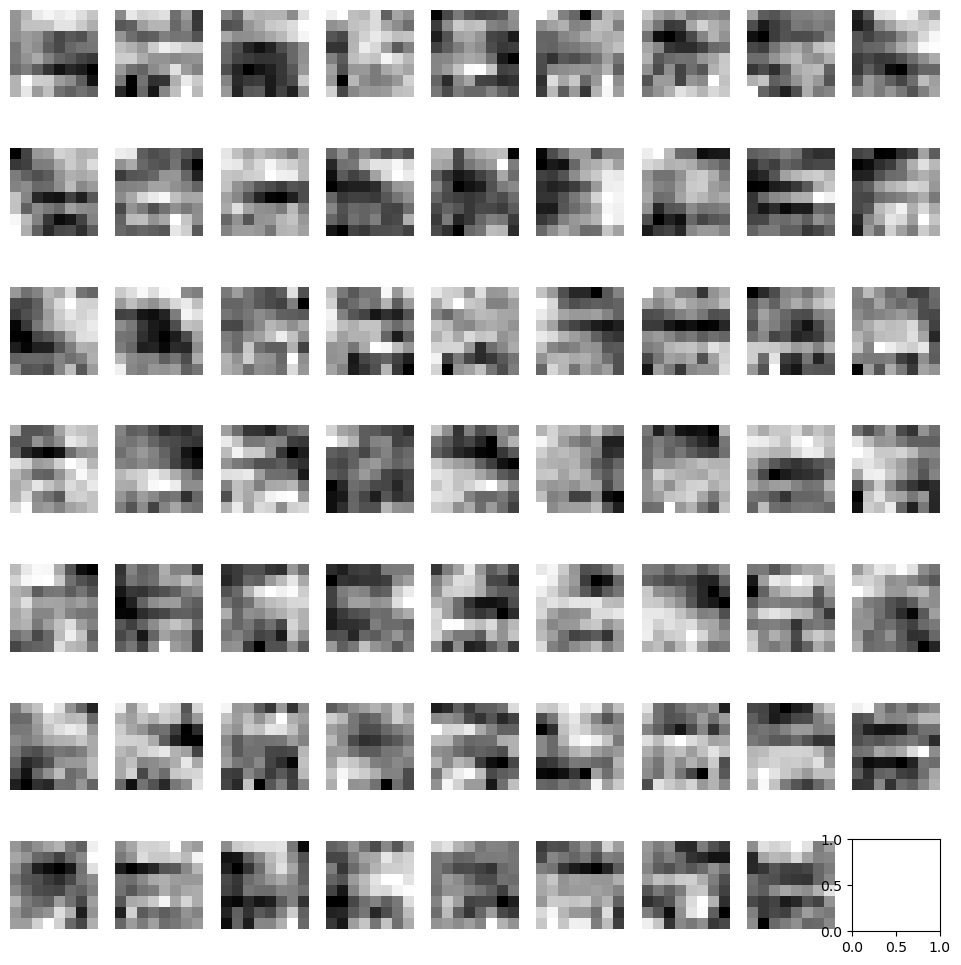

In [34]:
import matplotlib.pyplot as plt
import torch
import math
import torch.nn.functional as F


# Modeli değerlendirme moduna geçir
model.eval()

# Veri setinden bir örnek seçme
sample_index = 0  # Örnek indexini belirleyin
input_tensor, _ = train_dataset[sample_index]  # Giriş tensörünü seçin

# Giriş tensörünü GPU belleğine taşıma
input_tensor = input_tensor.to('cuda')

# İlgili katmandaki özellik haritalarını elde etme
conv1_output = model.features[0](input_tensor.unsqueeze(0))
relu1_output = F.relu(conv1_output)
conv2_output = model.features[2](relu1_output)
relu2_output = F.relu(conv2_output)
conv3_output = model.features[4](relu2_output)
relu3_output = F.relu(conv3_output)
conv4_output = model.features[6](relu3_output)
relu4_output = F.relu(conv4_output)
conv5_output = model.features[8](relu4_output)
relu5_output = F.relu(conv5_output)
conv6_output = model.features[10](relu5_output)

# Özellik haritalarını görselleştirmek için subplot kullanma
num_maps = conv6_output.shape[1]
num_rows = int(math.sqrt(num_maps))
num_cols = int(math.ceil(num_maps / num_rows))

# Subplot oluşturma
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

# Özellik haritalarını gösterme
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < num_maps:
            map_data = conv6_output[0, index].detach().cpu().numpy()
            ax = axs[i, j]
            ax.imshow(map_data, cmap='gray')
            #ax.set_title(f'Feature Map {index+1}')
            ax.axis('off')
        else:
            ax.axis('off')

plt.show()


In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Cihazı seçin (GPU kullanılacaksa)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Modeli tanımlayın
class VGG16(nn.Module):
    def __init__(self, num_classes=62):
        super(VGG16, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 62, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(62, 124, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(124, 248, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(248, 496, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(496, 992, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(992, 62, kernel_size=3, padding=1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(62 * 20 * 20, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# Hyperparameters
num_epochs = 25
learning_rate = 0.001
batch_size = 128

# Modeli oluşturma ve GPU'ya taşıma
model = VGG16(num_classes=62).to(device)

In [79]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


# Train veri setini TensorDataset olarak oluşturun
train_dataset = TensorDataset(torch.from_numpy(X_train).unsqueeze(1), torch.from_numpy(Y_train))

# Validation veri setini TensorDataset olarak oluşturun
val_dataset = TensorDataset(torch.from_numpy(X_val).unsqueeze(1), torch.from_numpy(Y_val))

# Test veri setini TensorDataset olarak oluşturun
test_dataset = TensorDataset(torch.from_numpy(X_test).unsqueeze(1), torch.from_numpy(Y_test))


In [80]:
# Loss fonksiyonu
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# DataLoader oluşturma
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [81]:
# Eğitim döngüsü
train_accuracy_list = []
val_accuracy_list = []


for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna geçir
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device).long()

        optimizer.zero_grad()  # Gradyanları sıfırla

        # İleri geçiş
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Geriye yayılım
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    train_loss /= len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_accuracy_list.append(train_accuracy)

    # Validasyon döngüsü
    model.eval()  # Modeli değerlendirme moduna geçir
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Gradyan hesaplamalarını kapat
        for val_inputs, val_targets in val_dataloader:
            val_inputs = val_inputs.to(device)
            val_targets = val_targets.to(device).long()

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item()

            _, predicted = torch.max(val_outputs, 1)
            val_total += val_targets.size(0)
            val_correct += (predicted == val_targets).sum().item()

    val_loss /= len(val_dataloader)
    val_accuracy = val_correct / val_total
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test döngüsü
model.eval()  # Modeli değerlendirme moduna geçir
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Gradyan hesaplamalarını kapat
    for test_inputs, test_targets in test_dataloader:
        test_inputs = test_inputs.to(device)
        test_targets = test_targets.to(device).long()

        test_outputs = model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item()

        _, predicted = torch.max(test_outputs, 1)
        test_total += test_targets.size(0)
        test_correct += (predicted == test_targets).sum().item()

test_loss /= len(test_dataloader)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch: 1/25, Loss: 18.3239, Val Loss: 3.6848, Train Accuracy: 0.0585, Val Accuracy: 0.0842
Epoch: 2/25, Loss: 3.6247, Val Loss: 3.4118, Train Accuracy: 0.1128, Val Accuracy: 0.1624
Epoch: 3/25, Loss: 3.3011, Val Loss: 2.9020, Train Accuracy: 0.1881, Val Accuracy: 0.2751
Epoch: 4/25, Loss: 2.8019, Val Loss: 2.1667, Train Accuracy: 0.2954, Val Accuracy: 0.4431
Epoch: 5/25, Loss: 2.1479, Val Loss: 1.7071, Train Accuracy: 0.4346, Val Accuracy: 0.5497
Epoch: 6/25, Loss: 1.6774, Val Loss: 1.4421, Train Accuracy: 0.5430, Val Accuracy: 0.6212
Epoch: 7/25, Loss: 1.3872, Val Loss: 1.2487, Train Accuracy: 0.6121, Val Accuracy: 0.6548
Epoch: 8/25, Loss: 1.1836, Val Loss: 1.1792, Train Accuracy: 0.6557, Val Accuracy: 0.6748
Epoch: 9/25, Loss: 1.0230, Val Loss: 1.0721, Train Accuracy: 0.6983, Val Accuracy: 0.6982
Epoch: 10/25, Loss: 0.8809, Val Loss: 1.0493, Train Accuracy: 0.7329, Val Accuracy: 0.7051
Epoch: 11/25, Loss: 0.7766, Val Loss: 1.0077, Train Accuracy: 0.7579, Val Accuracy: 0.7182
Epoch: 

In [82]:
import plotly.express as px
import pandas as pd

# Train ve validation accuracy değerlerini içeren bir DataFrame oluşturma
data = {
    'Epoch': list(range(1, num_epochs+1)),
    'Train Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list
}
df_px = pd.DataFrame(data)

# Plotly express kullanarak grafik çizme
fig = px.line(df_px, x='Epoch', y=['Train Accuracy', 'Validation Accuracy'], title='Eğitim ve Doğrulama Doğruluk Değerleri')
fig.show()


# **LeNet5**   **--GRID SEARCH--**

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import itertools

# Cihazı seçin (GPU kullanılacaksa)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Modeli tanımlayın
class LeNet5(nn.Module):
    def __init__(self, num_classes=62, filtre_sayilari=None):
        super(LeNet5, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, filtre_sayilari[0], kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(filtre_sayilari[0], filtre_sayilari[1], kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(filtre_sayilari[1], filtre_sayilari[2], kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(filtre_sayilari[2], filtre_sayilari[2], kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(filtre_sayilari[2], filtre_sayilari[2], kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(filtre_sayilari[2], num_classes, kernel_size=3, padding=1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(num_classes * 20 * 20, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [41]:
# Hyperparameters
num_epochs = [20]
learning_rates = [0.00001, 0.0001]
batch_sizes = [128]
filtre_sayilari = [[62, 62, 124, 248, 496, 62], [10, 10, 20, 40, 80, 62]]

hyperparameters = list(itertools.product(num_epochs, learning_rates, batch_sizes, filtre_sayilari))

In [42]:
# DataLoader oluşturma
train_dataloader = DataLoader(train_dataset, batch_size=batch_sizes[0], shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_sizes[0])
test_dataloader = DataLoader(test_dataset, batch_size=batch_sizes[0])

In [43]:

# Grid Search
for hyperparameter in hyperparameters:
    num_epochs, learning_rate, batch_size, filtre_sayilari = hyperparameter
    print(f"Hyperparameters: num_epochs={num_epochs}, learning_rate={learning_rate}, batch_size={batch_size}, filtre_sayilari={filtre_sayilari}")

    # Modeli oluşturma ve GPU'ya taşıma
    model = LeNet5(num_classes=62, filtre_sayilari=filtre_sayilari).to(device)

    # Loss fonksiyonu
    criterion = nn.CrossEntropyLoss()

    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracy_list = []
    val_accuracy_list = []
    hyperparams_list = []

    # Eğitim döngüsü
    for epoch in range(num_epochs):
        model.train()  # Modeli eğitim moduna geçir
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, targets in train_dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device).long()

            optimizer.zero_grad()  # Gradyanları sıfırla

            # İleri geçiş
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Geriye yayılım
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += targets.size(0)
            train_correct += (predicted == targets).sum().item()

        train_loss /= len(train_dataloader)
        train_accuracy = train_correct / train_total
        train_accuracy_list.append(train_accuracy)
        hyperparams_list.append(hyperparameter)

        # Validasyon döngüsü
        model.eval()  # Modeli değerlendirme moduna geçir
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():  # Gradyan hesaplamalarını kapat
            for val_inputs, val_targets in val_dataloader:
                val_inputs = val_inputs.to(device)
                val_targets = val_targets.to(device).long()

                val_outputs = model(val_inputs)
                val_loss += criterion(val_outputs, val_targets).item()

                _, predicted = torch.max(val_outputs, 1)
                val_total += val_targets.size(0)
                val_correct += (predicted == val_targets).sum().item()

        val_loss /= len(val_dataloader)
        val_accuracy = val_correct / val_total
        val_accuracy_list.append(val_accuracy)

        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Test döngüsü
    model.eval()  # Modeli değerlendirme moduna geçir
    test_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():  # Gradyan hesaplamalarını kapat
        for test_inputs, test_targets in test_dataloader:
            test_inputs = test_inputs.to(device)
            test_targets = test_targets.to(device).long()

            test_outputs = model(test_inputs)
            test_loss += criterion(test_outputs, test_targets).item()

            _, predicted = torch.max(test_outputs, 1)
            test_total += test_targets.size(0)
            test_correct += (predicted == test_targets).sum().item()

    test_loss /= len(test_dataloader)
    test_accuracy = test_correct / test_total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Hyperparameters: num_epochs=20, learning_rate=1e-05, batch_size=128, filtre_sayilari=[62, 62, 124, 248, 496, 62]
Epoch: 1/20, Loss: 3.7544, Val Loss: 3.4192, Train Accuracy: 0.0983, Val Accuracy: 0.2215
Epoch: 2/20, Loss: 2.6410, Val Loss: 1.7592, Train Accuracy: 0.3679, Val Accuracy: 0.5583
Epoch: 3/20, Loss: 1.6357, Val Loss: 1.2725, Train Accuracy: 0.5728, Val Accuracy: 0.6670
Epoch: 4/20, Loss: 1.2753, Val Loss: 1.0871, Train Accuracy: 0.6513, Val Accuracy: 0.7113
Epoch: 5/20, Loss: 1.0899, Val Loss: 1.0073, Train Accuracy: 0.6969, Val Accuracy: 0.7305
Epoch: 6/20, Loss: 0.9706, Val Loss: 0.9614, Train Accuracy: 0.7250, Val Accuracy: 0.7451
Epoch: 7/20, Loss: 0.8755, Val Loss: 0.9124, Train Accuracy: 0.7536, Val Accuracy: 0.7555
Epoch: 8/20, Loss: 0.8009, Val Loss: 0.8755, Train Accuracy: 0.7675, Val Accuracy: 0.7598
Epoch: 9/20, Loss: 0.7205, Val Loss: 0.8644, Train Accuracy: 0.7886, Val Accuracy: 0.7643
Epoch: 10/20, Loss: 0.6598, Val Loss: 0.8410, Train Accuracy: 0.8032, Val Acc

KeyboardInterrupt: 

**Grid Search sonucu bize en yüksek test accuracy'sini veren hiperparametrelerin ışığında eğitilen train ve validasyon kümemin her epoktaki değerlerinin grafik üzerinde yorumu:**

In [ ]:
import plotly.express as px

epochs = range(1, 21)
train_accuracy = [0.1085, 0.3667, 0.5869, 0.6615, 0.7012, 0.7335, 0.7493, 0.7724, 0.7918, 0.8047, 0.8266, 0.8363, 0.8564, 0.8711, 0.8829, 0.8905, 0.9072, 0.9133, 0.9217, 0.9294]
val_accuracy = [0.2618, 0.5583, 0.6809, 0.7118, 0.7262, 0.7425, 0.7529, 0.7547, 0.7611, 0.7697, 0.7675, 0.7785, 0.7739, 0.7798, 0.7811, 0.7862, 0.7889, 0.7841, 0.7862, 0.7862]

data = {
    'Epoch': epochs,
    'Train Accuracy': train_accuracy,
    'Val Accuracy': val_accuracy
}

fig = px.line(data, x='Epoch', y=['Train Accuracy', 'Val Accuracy'], title='Accuracy over Epochs')
fig.show()

**Aşağıdaki özelleştirdiğim LeNet5 modelinde ise bu sefer konvolüsyon katmanlarında padding kullanmayarak çıkış matrislerimin boyutunun küçülmesine izin verdim. Bu örnekte 20x20 ile başlayan matris boyutum 5.konvolüsyon katmanı sonunda 1x1 boyutuna kadar düşüyor. Her ne kadar feature map sayım aynı kalsa da eğitim kümemin büyük oranda veri kaybetmesi, model tarafından sınıflandırılmak üzere gerekecek olan ayırt edici özelliklerini azalttığını düşünüyorum.** 

In [ ]:
import torch
import torch.nn as nn

class LeNet5(nn.Module):
    def __init__(self, num_classes=62):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.Conv2d(6, 12, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(12, 24, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(24, 48, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.Conv2d(48, 62, kernel_size=1)

        )
        self.classifier = nn.Sequential(
            nn.Linear(62, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Modeli oluştur
num_classes = 62

In [ ]:
summary(model)

![Imgur](https://i.imgur.com/EbYcexs.png)

In [ ]:
sample_input = torch.randn(1, 1, 20, 20).to('cuda')  # Örnek giriş tensörü şekli

# Giriş tensörünü modele ileterek çıkışı al
output = model.features(sample_input)

# Çıkışın şeklini kontrol et
output_shape = output.shape
print("Son konvolüsyon katmanının çıkış şekli:", output_shape)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
model = LeNet5(num_classes=62).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [ ]:

num_epochs=200

# Eğitim döngüsü
train_accuracy_list = []
val_accuracy_list = []

for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna geçir
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, targets in train_dataloader:
        inputs = inputs.to(device)
        targets = targets.to(device).long()

        optimizer.zero_grad()  # Gradyanları sıfırla

        # İleri geçiş
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Geriye yayılım
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_total += targets.size(0)
        train_correct += (predicted == targets).sum().item()

    train_loss /= len(train_dataloader)
    train_accuracy = train_correct / train_total
    train_accuracy_list.append(train_accuracy)

    # Validasyon döngüsü
    model.eval()  # Modeli değerlendirme moduna geçir
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():  # Gradyan hesaplamalarını kapat
        for val_inputs, val_targets in val_dataloader:
            val_inputs = val_inputs.to(device)
            val_targets = val_targets.to(device).long()

            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs, val_targets).item()

            _, predicted = torch.max(val_outputs, 1)
            val_total += val_targets.size(0)
            val_correct += (predicted == val_targets).sum().item()

    val_loss /= len(val_dataloader)
    val_accuracy = val_correct / val_total
    val_accuracy_list.append(val_accuracy)

    print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

# Test döngüsü
model.eval()  # Modeli değerlendirme moduna geçir
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():  # Gradyan hesaplamalarını kapat
    for test_inputs, test_targets in test_dataloader:
        test_inputs = test_inputs.to(device)
        test_targets = test_targets.to(device).long()

        test_outputs = model(test_inputs)
        test_loss += criterion(test_outputs, test_targets).item()

        _, predicted = torch.max(test_outputs, 1)
        test_total += test_targets.size(0)
        test_correct += (predicted == test_targets).sum().item()

test_loss /= len(test_dataloader)
test_accuracy = test_correct / test_total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
import plotly.express as px
import pandas as pd

# Train ve validation accuracy değerlerini içeren bir DataFrame oluşturma
data = {
    'Epoch': list(range(1, num_epochs+1)),
    'Train Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list
}
df_px = pd.DataFrame(data)

# Plotly express kullanarak grafik çizme
fig = px.line(df_px, x='Epoch', y=['Train Accuracy', 'Validation Accuracy'], title='Eğitim ve Doğrulama Doğruluk Değerleri')
fig.show()


**Görüldüğü üzere feature map'lerin boyutlarını küçültmek modelimizi eğitmek konusunda bize problem çıkarıyor. Uzun bir eğitim sonrasında validasyon kümesinin accuracy'si daha fazla yükselmezken train kümesi arayı açıyor.**